### Customer Segmentation / Clustering

### Number of cluster =3 and Algorithm = Kmeans

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.4071885035287295
Silhouette Score: 0.2297679518484837


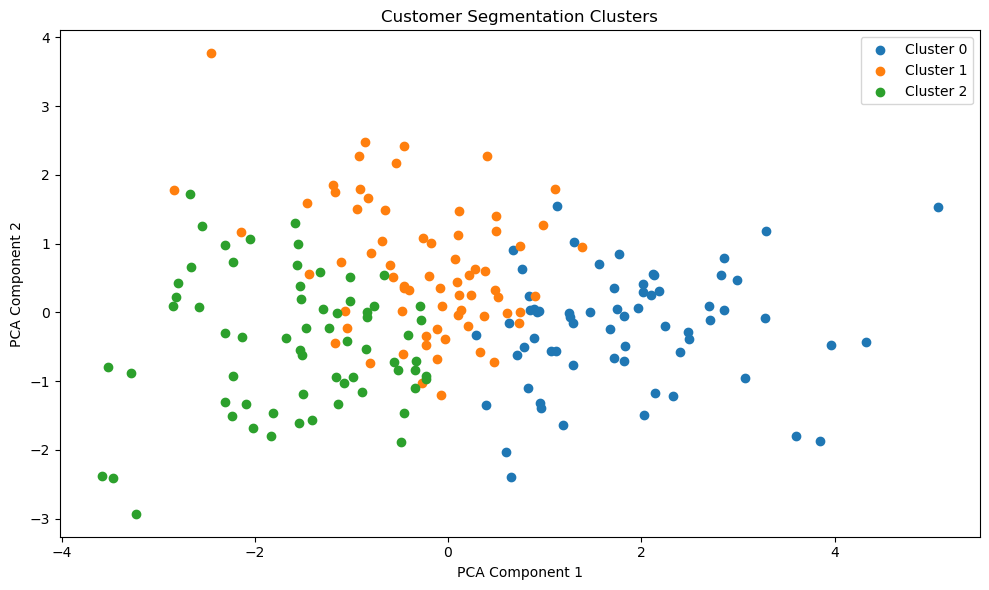

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

merged_data = pd.merge(customers, transactions, on='CustomerID')

agg_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'Quantity': 'sum',         # Total quantity purchased
    'Price': 'mean',           # Average price
    'TransactionID': 'count'   # Number of transactions
}).reset_index()

final_data = pd.merge(customers, agg_data, on='CustomerID')
le = LabelEncoder()
final_data['Region'] = le.fit_transform(final_data['Region'])
features = ['Region', 'TotalValue', 'Quantity', 'Price', 'TransactionID']
X = final_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)  # number of cluster =3
clusters = kmeans.fit_predict(X_scaled)
final_data['Cluster'] = clusters

db_index = davies_bouldin_score(X_scaled, clusters)
silhouette = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


### Number of cluster =4 and Algorithm = Kmeans

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.2599965611883293
Silhouette Score: 0.243601122009108


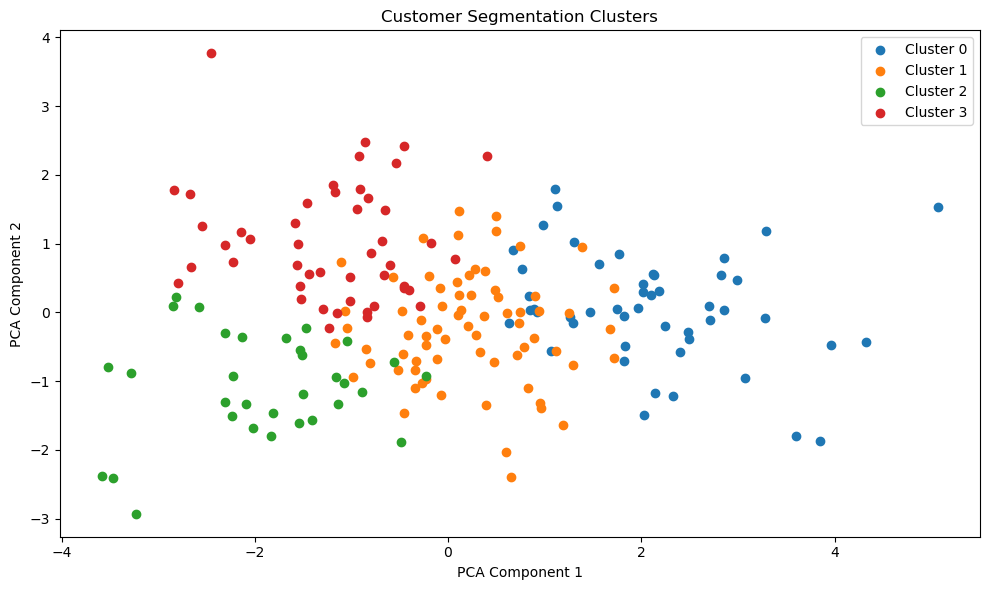

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

merged_data = pd.merge(customers, transactions, on='CustomerID')

agg_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'Quantity': 'sum',         # Total quantity purchased
    'Price': 'mean',           # Average price
    'TransactionID': 'count'   # Number of transactions
}).reset_index()


final_data = pd.merge(customers, agg_data, on='CustomerID')
le = LabelEncoder()
final_data['Region'] = le.fit_transform(final_data['Region'])
features = ['Region', 'TotalValue', 'Quantity', 'Price', 'TransactionID']
X = final_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)  # number of cluster =4
clusters = kmeans.fit_predict(X_scaled)
final_data['Cluster'] = clusters

db_index = davies_bouldin_score(X_scaled, clusters)
silhouette = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


###  Number of cluster =5 and Algorithm = Kmeans

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

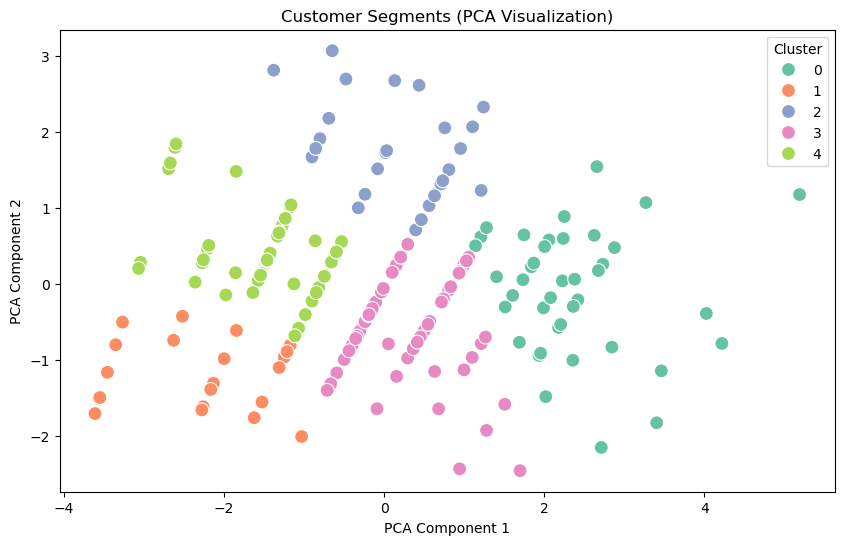

Optimal Number of Clusters: 5
Davies-Bouldin Index: 0.8990
Silhouette Score: 0.3633
Clustered data saved to Customer_Segments.csv.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()
customer_data = customers.merge(customer_transactions, on='CustomerID', how='inner')
features = ['total_spent', 'avg_transaction_value', 'total_transactions', 'unique_products']
X = customer_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
optimal_clusters = None
optimal_db_index = float('inf')

db_indexes = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X_scaled, cluster_labels)
    db_indexes.append(db_index)

    
    if db_index < optimal_db_index:
        optimal_db_index = db_index
        optimal_clusters = k
        optimal_model = kmeans


customer_data['Cluster'] = optimal_model.labels_

# Calculate silhouette score for additional validation
silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {optimal_db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

customer_data.to_csv('Customer_Segments.csv', index=False)
print("Clustered data saved to Customer_Segments.csv.")


### Number of cluster =6 and Algorithm = Kmeans

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.1804319982493674
Silhouette Score: 0.2509791126558729


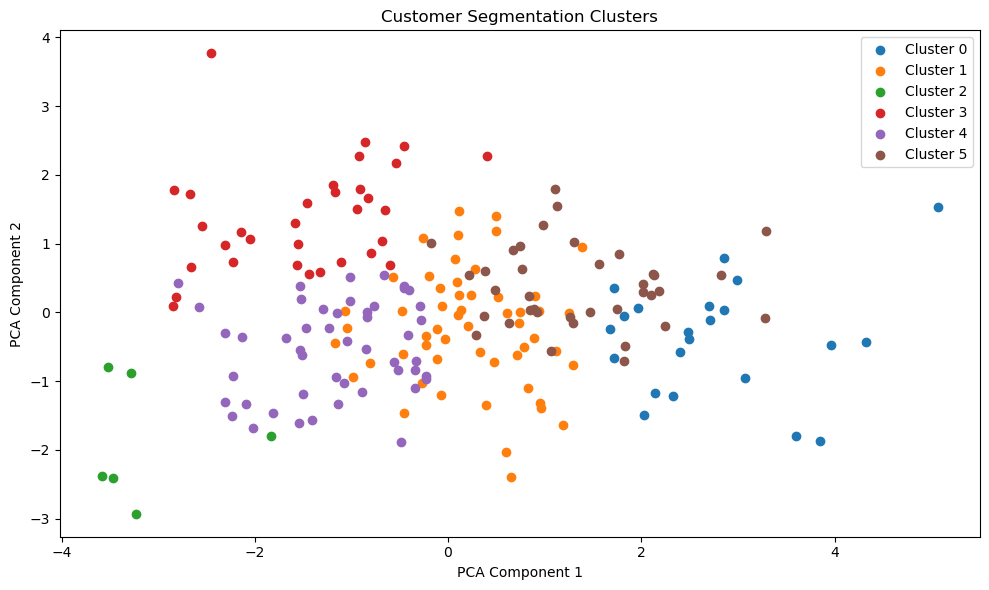

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


merged_data = pd.merge(customers, transactions, on='CustomerID')

agg_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'Quantity': 'sum',         # Total quantity purchased
    'Price': 'mean',           # Average price
    'TransactionID': 'count'   # Number of transactions
}).reset_index()

final_data = pd.merge(customers, agg_data, on='CustomerID')
le = LabelEncoder()
final_data['Region'] = le.fit_transform(final_data['Region'])
features = ['Region', 'TotalValue', 'Quantity', 'Price', 'TransactionID']
X = final_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)  # number of cluster =6
clusters = kmeans.fit_predict(X_scaled)
final_data['Cluster'] = clusters

db_index = davies_bouldin_score(X_scaled, clusters)
silhouette = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


### Algorithm = DBSCAN

Davies-Bouldin Index: 1.131656082699966
Silhouette Score: 0.28916010967559375
Number of Clusters (excluding noise): 26
Noise Points: 2


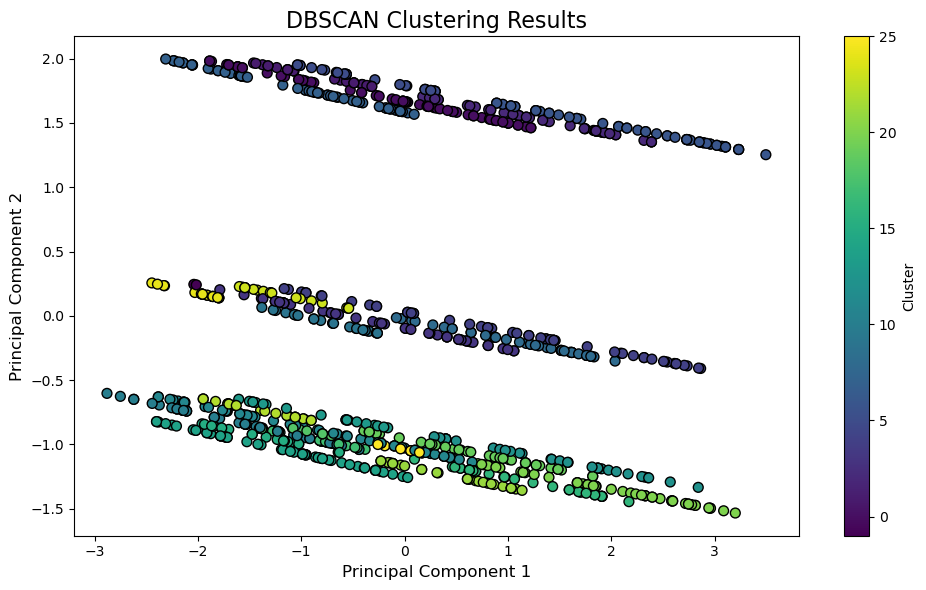

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
data = pd.merge(customers, transactions, on="CustomerID")
features = data[["Region", "Quantity", "TotalValue", "Price"]]
features = pd.get_dummies(features, columns=["Region"], drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Evaluate Clustering
dbi = davies_bouldin_score(scaled_features, dbscan_labels)
silhouette = silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else "Not Applicable"

print(f"Davies-Bouldin Index: {dbi}")
print(f"Silhouette Score: {silhouette}")

data['Cluster'] = dbscan_labels

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

unique_labels = set(dbscan_labels)  
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise (-1)

print(f"Number of Clusters (excluding noise): {num_clusters}")
print(f"Noise Points: {list(dbscan_labels).count(-1)}")


plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap="viridis", s=50, edgecolor="k")
plt.title("DBSCAN Clustering Results", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

